### Problema de regresion - Predecir los precios de un automovil basado en sus caracteristicas y marca.

Tenemos un dataset con diferentes parametros de un vehiculo. Cada fila contiene el valor de dichos parametros para un determinado vehiculo, incluido el precio del mismo.

Se desea construir un sistema de recomendacion donde si tenemos un vehiculo que queremos vender, basado en los parametros de ese vehiculo que le enviemos a dicho sistema el nos recomiende a que precio debemos vender dicho vehiculo.

In [2]:
# Importamos librerias necesarias.

import pandas as pd
import numpy as np
import visuals as vs

# Conf. inicial de pandas para mostrar todas las columnas y filas.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Leemos el dataset.
datos_automovil = pd.read_csv('Automobile_data.csv')

# Imprimimos el dataset.
datos_automovil

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.0
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.0
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.0
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.0
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430.0
5,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16925.0
6,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.00,121,4250,21,28,20970.0
7,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2765,ohc,six,164,mpfi,3.31,3.19,9.00,121,4250,21,28,21105.0
8,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.50,48,5100,47,53,5151.0
9,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.60,70,5400,38,43,6295.0


#### Separacion de la variable dependiente de la variable independiente.

Aqui separamos la variable que queremos predecir (el precio del vehiculo o variable dependiente) de los parametros o caracteristicas que nos permitiran realizar tal prediccion (atributos/features o variable independiente).

In [3]:
# Separamos la variable que queremos predecir de las demas caracteristicas.
precios_automovil = datos_automovil['price']
datos_automovil = datos_automovil.drop('price', axis = 1)

datos_automovil

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29
5,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29
6,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.00,121,4250,21,28
7,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2765,ohc,six,164,mpfi,3.31,3.19,9.00,121,4250,21,28
8,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.50,48,5100,47,53
9,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.60,70,5400,38,43


### Analisis de datos.

En esta etapa vamos a conocer informacion sobre los datos que tenemos y su comportamiento el cual nos dira si tenemos que hacer algun preprocesamiento antes de enviarlo a algun algoritmo de ML.

Obtedremos la siguiente informacion:
- Estadisticas basicas.
- Atributos altamente sesgados.

In [4]:
# Estadisticas basicas.

# Precio minimo en el dataset.
precio_min = precios_automovil.min()

#Precio maximo en el dataset
precio_max = precios_automovil.max()

#Media de precios.
precio_media = precios_automovil.mean()

#Mediana de precios.
precio_mediana = precios_automovil.median()

#Desviacion estandar precios.
precio_std = precios_automovil.std()

print "Estadisticas para el dataset de los precios de automoviles:\n"
print "Precio minimo: ${:,.2f}".format(precio_min)
print "Precio maximo: ${:,.2f}".format(precio_max)
print "Precio promedio: ${:,.2f}".format(precio_media)
print "Mediana del precio ${:,.2f}".format(precio_mediana)
print "Desviacion estandar de los precios: ${:,.2f}".format(precio_std)



Estadisticas para el dataset de los precios de automoviles:

Precio minimo: $5,118.00
Precio maximo: $35,056.00
Precio promedio: $11,445.73
Mediana del precio $9,233.00
Desviacion estandar de los precios: $5,877.86


#### Detectando los atributos altamente sesgados.

Se detectan los atributos altamente sesgado calculando en cada uno el coeficiente de sesgo y luego se seleccionan los mas sesgados. Los atributos altamente sesgados pueden ser un problema debido a que sus valores extremadamente altos y extremadamente pequenos (outliers) pueden alterar significativamente la prediccion del algoritmo.

In [6]:
# Calculando el coeficiente de sesgo para cada atributo continuo.

sesgo_normalized_losses = datos_automovil['normalized-losses'].skew()
sesgo_wheel_base = datos_automovil['wheel-base'].skew()
sesgo_length = datos_automovil['length'].skew()
sesgo_width = datos_automovil['width'].skew()
sesgo_height = datos_automovil['height'].skew()
sesgo_curb_weight = datos_automovil['curb-weight'].skew()
sesgo_engine_size = datos_automovil['engine-size'].skew()
sesgo_bore = datos_automovil['bore'].skew()
sesgo_stroke = datos_automovil['stroke'].skew()
sesgo_compression_ratio = datos_automovil['compression-ratio'].skew()
sesgo_horsepower = datos_automovil['horsepower'].skew()
sesgo_peak_rpm = datos_automovil['peak-rpm'].skew()
sesgo_city_mpg = datos_automovil['city-mpg'].skew()
sesgo_highway_mpg = datos_automovil['highway-mpg'].skew()


print "Coeficiente de sesgo para los atributos continuos:\n"
print "normalized-losses: {:,.2f}".format(sesgo_normalized_losses)
print "wheel-base: {:,.2f}".format(sesgo_wheel_base)
print "length: {:,.2f}".format(sesgo_length)
print "width: {:,.2f}".format(sesgo_width)
print "height: {:,.2f}".format(sesgo_height)
print "curb-weight: {:,.2f}".format(sesgo_curb_weight)
print "engine-size: {:,.2f}".format(sesgo_engine_size)
print "bore: {:,.2f}".format(sesgo_bore)
print "stroke: {:,.2f}".format(sesgo_stroke)
print "compression-ratio: {:,.2f}".format(sesgo_compression_ratio)
print "horsepower: {:,.2f}".format(sesgo_horsepower)
print "peak-rpm: {:,.2f}".format(sesgo_peak_rpm)
print "city-mpg: {:,.2f}".format(sesgo_city_mpg)
print "highway-mpg: {:,.2f}".format(sesgo_highway_mpg)


Coeficiente de sesgo para los atributos continuos:

normalized-losses: 0.84
wheel-base: 0.91
length: -0.07
width: 0.92
height: 0.17
curb-weight: 0.78
engine-size: 1.49
bore: 0.16
stroke: -0.99
compression-ratio: 2.71
horsepower: 0.92
peak-rpm: 0.15
city-mpg: 0.73
highway-mpg: 0.60


### Preprocesamiento: Aplicando transformacion logaritmica a los atributos altamente sesgados.

La transformacion logaritmica reduce significativamente el efecto de los valores extremadamente altos y extremadamente pequenos de un atributo determinado. En este caso solo tenemos 2 atributos altamente sesgados: 'compression-ratio' y 'engine-size'

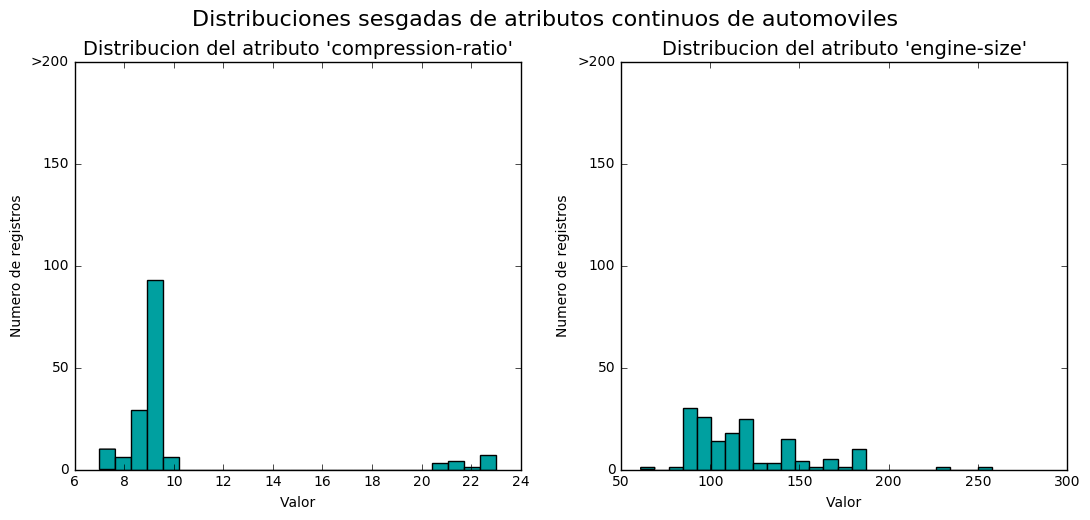

In [7]:
atributos_sesgados = ['compression-ratio','engine-size']

vs.distribution(datos_automovil)

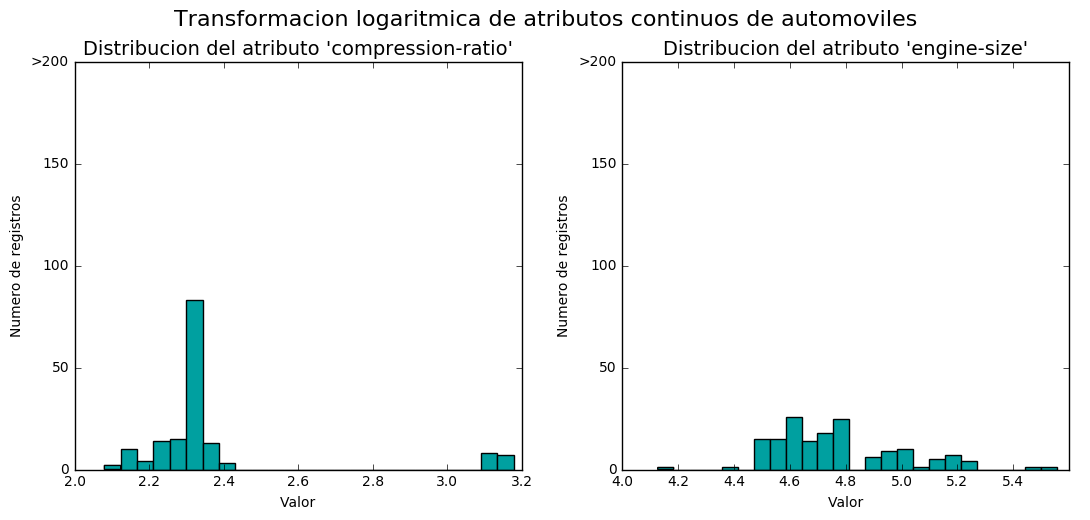

In [8]:
# Transformacion logaritmica de atributos.
datos_automovil[atributos_sesgados] = datos_automovil[atributos_sesgados].apply(lambda x: np.log(x + 1))

vs.distribution(datos_automovil, transformed = True)

#### Normalizacion de los atributos continuos.

Normalizaremos los atributos numericos de manera que se acerquen lo mas posible a una distribucion normal (Gauss). Esto se hace debido a que la mayoria de algoritmos de ML fueron escritos basados en que la data que reciben esta distribuida de manera normal.

In [9]:
# Importamos el MinMax scaler que escalara los valores continuos en un rango entre 0 y 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
atr_numericos = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

datos_automovil[atr_numericos] = scaler.fit_transform(datos_automovil[atr_numericos])

datos_automovil.head(n = 1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,2,0.518325,audi,gas,std,four,sedan,fwd,front,0.455172,0.577236,0.517544,0.471154,0.329325,ohc,four,0.401027,mpfi,0.464286,0.633333,0.289869,0.355263,0.55102,0.264706,0.333333


#### Convirtiendo los atributos categoricos en numericos

Este paso es necesario ya que la mayoria de algoritmos de ML solo reciben parametros numericos y no categoricos.

In [10]:
# Usamos la funcion get_dummies para aplicar OneHotEncoding.

atributos = pd.get_dummies(datos_automovil)
encoded = list(atributos.columns)

print "Total de atributos despues del One-hot encoding {}".format(len(encoded))
print encoded

Total de atributos despues del One-hot encoding 64
['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda', 'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth', 'make_porsche', 'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo', 'fuel-type_diesel', 'fuel-type_gas', 'aspiration_std', 'aspiration_turbo', 'num-of-doors_four', 'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd', 'engine-location_front', 'engine-type_dohc', 'engine-type_l', 'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv', 'num-of-cylinders_eight', 'num-of-cylinders_five', 'num-of-c

#### Imprimimos el dataframe con los atributos codificados con One-Hot encoding.

In [11]:
atributos

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi
0,2,0.518325,0.455172,0.577236,0.517544,0.471154,0.329325,0.401027,0.464286,0.633333,0.289869,0.355263,0.551020,0.264706,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0.518325,0.441379,0.577236,0.535088,0.471154,0.518231,0.554557,0.464286,0.633333,0.107211,0.440789,0.551020,0.088235,0.111111,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0.486911,0.662069,0.839024,0.973684,0.605769,0.525989,0.554557,0.464286,0.633333,0.156425,0.407895,0.551020,0.117647,0.194444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.486911,0.662069,0.839024,0.973684,0.625000,0.619860,0.528552,0.421429,0.633333,0.137057,0.605263,0.551020,0.058824,0.055556,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,0.664921,0.503448,0.580488,0.394737,0.471154,0.351823,0.394639,0.685714,0.347619,0.184725,0.348684,0.673469,0.235294,0.305556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0,0.664921,0.503448,0.580488,0.394737,0.471154,0.351823,0.394639,0.685714,0.347619,0.184725,0.348684,0.673469,0.235294,0.305556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0,0.643979,0.503448,0.580488,0.394737,0.471154,0.474011,0.684630,0.550000,0.533333,0.203114,0.480263,0.040816,0.176471,0.277778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0,0.643979,0.503448,0.580488,0.394737,0.471154,0.495345,0.684630,0.550000,0.533333,0.203114,0.480263,0.040816,0.176471,0.277778,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,2,0.293194,0.062069,0.000000,0.000000,0.365385,0.000000,0.000000,0.264286,0.457143,0.247525,0.000000,0.387755,0.941176,0.972222,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9,1,0.172775,0.272414,0.240650,0.289474,0.250000,0.149728,0.268397,0.350000,0.495238,0.256153,0.144737,0.510204,0.676471,0.69

### Desarrollando el modelo.

- Para este proyecto utilizaremos Supervised Learning y como algoritmo de supervised learning utilizaremos el arbol de decision. Como es un problema de regresion utilizaremos un regresor basado en arboles de decision, el DecisionTreeRegressor.

- Utilizaremos Cross-validation.

In [12]:
from sklearn.cross_validation import train_test_split

# Dividimos la data en set de entrenamiento (training set, 80%) y en set de pruebas (testing set, 20%).
autos_train, autos_test, precios_train, precios_test = train_test_split(atributos,precios_automovil,test_size=0.2,random_state=0)

# Mostramos los resultados despues de la division.
print "Training set tiene {} muestras".format(autos_train.shape[0])
print "Testing set tiene {} muestras".format(autos_test.shape[0])

Training set tiene 127 muestras
Testing set tiene 32 muestras


In [13]:
# Importando librerias para graficar.
import matplotlib.pyplot as pl
import sklearn.learning_curve as curves

# Seleccionaremos el decision tree regressor.
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Importando librerias para implementar cross-validation
from sklearn.cross_validation import ShuffleSplit

# Funciones para medir rendimiento de los modelos de regresion.

def ModelLearning(X, y):
    """ Calcula el rendimiento de varios modelos con data de entrenamiento de tamanos variables.
        Los puntajes de training y testing son graficados. """
    
    # Creamos 10 cross-validation sets para training y testing.
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Generamos los tamanos del training set incrementando por 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Creamos la ventana de la grafica.
    fig = pl.figure(figsize=(10,7))

    # Creamos 4 modelos diferentes del alg. Decision Tree Regressor basados en el parametro max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        # Creamos un regresor tipo Decision Tree Regrespr cuyo parametro max_depth = depth.
        regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculamos los puntajes de entrenamiento y prueba.
        sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Encontramos la media y desviacion estandar para suavizar (smoothing).
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Dibujamos la curva de aprendizaje. 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Etiquetas
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Numero de puntos de entrenamiento')
        ax.set_ylabel('Puntaje')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Estilos visuales.
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Rendimiento de aprendizaje del Decision Tree Regressor', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()
    

def ModelComplexity(X, y):
    """ Calcula el rendimiento del modelo a medida que la complejidad del modelo incrementa.
        Las tasas de error de aprendizaje y prueba son luego graficadas. """
    
    # Creamos 10 cross-validation sets para training y testing.
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Variamos el parametro max_depth de 1 a 10.
    max_depth = np.arange(1,11)

    # Calculamos los puntajes de training y testing.
    train_scores, test_scores = curves.validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Encontramos la media y desviacion estandar para suavizado (smoothing).
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Dibujamos la curva de validacion.
    pl.figure(figsize=(7, 5))
    pl.title('Rendimiento de complejidad en el Decision Tree Regressor')
    pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Puntaje de entrenamiento')
    pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Puntaje de validacion')
    pl.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Estilos visuales.
    pl.legend(loc = 'lower right')
    pl.xlabel('Maximum Depth')
    pl.ylabel('Puntaje')
    pl.ylim([-0.05,1.05])
    pl.show()


def PredictTrials(X, y, fitter, data):
    """ Realiza pruebas de entrenamiento y prediccion de data. """

    # Almacenamos los precios que ya se han predicho.
    prices = []

    for k in range(10):
        # Dividimos los datos.
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)
        
        # Ajustamos (entrenamos) la data.
        reg = fitter(X_train, y_train)
        
        # Hacemos una prediccion
        pred = reg.predict([data[0]])[0]
        prices.append(pred)
        
        # Resultado
        print "Trial {}: ${:,.2f}".format(k+1, pred)

    # Mostramos el rango de precios.
    print "\nRango en precios: ${:,.2f}".format(max(prices) - min(prices))
    

def performance_metric(y_true, y_predict):
    """ Realiza medicion del rendimiento de que tan precisa es la prediccion """
    score = r2_score(y_true,y_predict)
    
    return score
    

#### Curvas de aprendizaje.

Con las curvas de aprendizaje veremos donde existe alto variance o alto bias.

Si los puntajes de error tanto para training como testing convergen el modelo esta biased (o parcializado).
Si la diferencia de error tanto en training como en testing es muy grande, el modelo sufre de alta variance (o discrepancia).

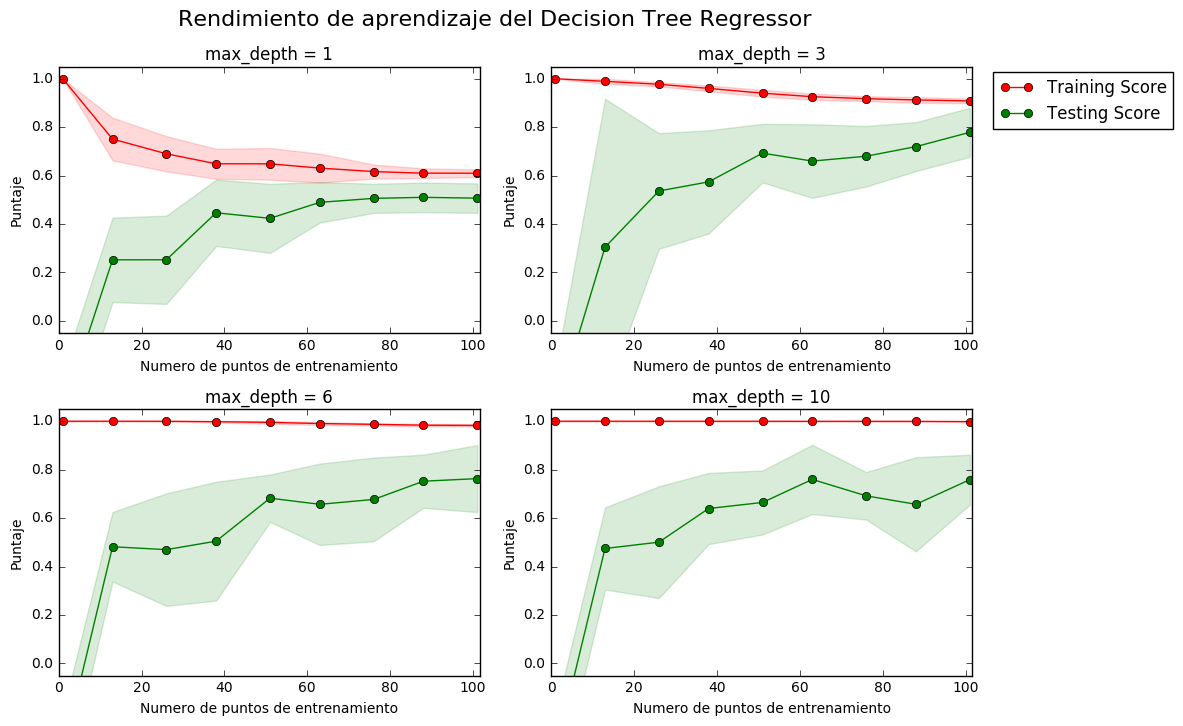

In [14]:
ModelLearning(autos_train,precios_train)

#### Curvas de complejidad.

En las curvas de complejidad podemos ir viendo como van variando los puntajes a medida que cambiamos el parametro max_depth del DecisionTreeRegressor. Mientras mas grande es la diferencia entre el puntaje de entrenamiento y el puntaje de validacion, el bias va cayendo pero el variance va aumentando.

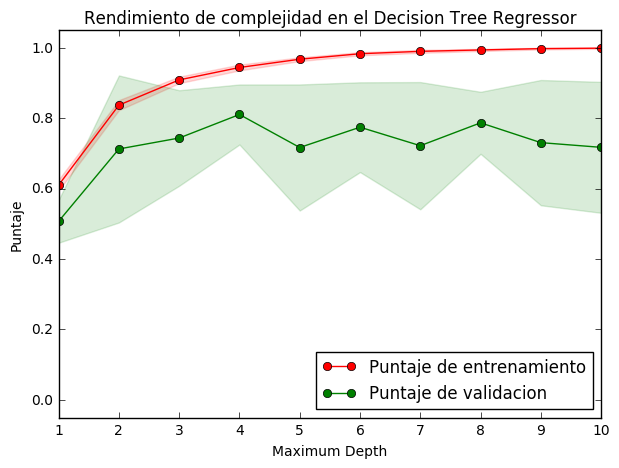

In [15]:
ModelComplexity(autos_train,precios_train)

### Optimizacion del modelo.

Buscaremos como optimizar los parametros del modelo seleccionado para obtener el modelo mas optimo para la prediccion el cual sera nuestro modelo final.

In [16]:
# Usaremos GridSearchCV para cross-validation.

from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer


def ajustar_modelo(X,y):
    
    # Creamos cross-validation sets a partir del training set.
    cv_sets = ShuffleSplit(X.shape[0], n_iter=10, test_size = 0.20, random_state=0)
    
    # Creamos un objeto del tipo DecisionTreeRegressor.
    regressor = DecisionTreeRegressor()
    
    # Creamos un diccionario para el parametro 'max_depth' con el rango del 1 al 10.
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
    
    # Transformar la funcion 'performance_metric' en una funcion de puntaje, usando make_scorer
    scoring_fnc = make_scorer(performance_metric)
    
    # Create grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)
    
    # Entrenamos el objeto grid search con data para computar el modelo mas optimo.
    grid = grid.fit(X,y)
    
    # Retornamos el modelo mas optimo.
    return grid.best_estimator_

### Modelo final

Luego de determinar cual es el mejor modelo utilizando Cross Validation, ahora obtendremos el modelo final y comenzaremos a hacer predicciones.

In [17]:
# Obtenemos el modelo final.
reg = ajustar_modelo(autos_train,precios_train)

# Imprimimos el parametro max_depth optimo del modelo.
print "El parametro max_depth es de {} para el modelo optimo.".format(reg.get_params()['max_depth'])

El parametro max_depth es de 5 para el modelo optimo.


### Haciendo predicciones con el modelo.

In [21]:
# Declaramos un array de parametros.
# symboling (Enteros positivos, negativos y cero)
# normalized-losses (entre 0 y 1, continuo).
# wheel-base (entre 0 y 1, continuo).
# length (entre 0 y 1, continuo).
# width (entre 0 y 1, continuo).
# height (entre 0 y 1, continuo).
# curb-weight (entre 0 y 1, continuo).
# engine-size (entre 0 y 1, continuo).
# bore (entre 0 y 1, continuo).
# stroke (entre 0 y 1, continuo).
# compression-ratio (entre 0 y 1, continuo).
# horsepower (entre 0 y 1, continuo).
# peak-rpm (entre 0 y 1, continuo).
# city-mpg (entre 0 y 1, continuo).
# highway-mpg (entre 0 y 1, continuo).
# make_audi (0 o 1).
# make_bmw (0 o 1).
# make_chevrolet (0 o 1).
# make_dodge (0 o 1).
# make_honda (0 o 1).
# make_jaguar (0 o 1).
# make_mazda (0 o 1).
# make_mercedes_benz (0 o 1).
# make_mitsubishi (0 o 1).
# make_nissan (0 o 1).
# make_peugeot (0 o 1).
# make_plymouth (0 o 1).
# make_porsche (0 o 1).
# make_saab (0 o 1).
# make_subaru (0 o 1).
# make_toyota (0 o 1).
# make_volkswagen (0 o 1).
# make_volvo (0 o 1).
# fuel-type_diesel (0 o 1).
# fuel-type_gas (0 o 1).
# aspiration_std (0 o 1).
# aspiration_turbo (0 o 1).
# num-of_doors_four (0 o 1).
# num-of_doors_two (0 o 1).
# body-style_convertible (0 o 1).
# body-style_hardtop (0 o 1).
# body-style_hatchback (0 o 1).
# body-style_sedan (0 o 1).
# body-style_wagon (0 o 1).
# drive-wheels_4wd (0 o 1).
# drive-wheels_fwd (0 o 1).
# drive-wheels_rwd (0 o 1).
# engine-location_front (0 o 1).
# engine-type_dohc (0 o 1).
# engine-type_I (0 o 1).
# engine-type_ohc (0 o 1).
# engine-type_ohcf (0 o 1).
# engine-type_ohcv (0 o 1).
# num-of-cylinders_eight (0 o 1).
# num-of-cylinders_five (0 o 1).
# num-of-cylinders_four (0 o 1).
# num-of-cylinders_six (0 o 1).
# num-of-cylinders_three (0 o 1).
# fuel-system_1bbl (0 o 1).
# fuel-system_2bbl (0 o 1).
# fuel-system_idi (0 o 1).
# fuel-system_mfi (0 o 1).
# fuel-system_mpfi (0 o 1).
# fuel-system_spdi (0 o 1).

# Definimos un automovil con las siguientes caracteristicas:
client_data = [[3, 0.578, 0.810, 0.500, 0.1450, 0.258, 0.771, 0.180, 0.189, 0.110, 0.900, 0.560, 0.780, 0.120, 0.380, \
              0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, \
              1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, \
              1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

precio = reg.predict(client_data)

print "El precio recomendado es: ${:,.2f} dolares.".format(precio[0])


El precio recomendado es: $32,250.00 dolares.


### Serializando el modelo para servirlo a produccion.

Con este paso podremos integrar nuestro modelo ya desarrollado en nuestra aplicacion web.

In [22]:
# Importamos la libreria pickle para serializar el modelo ya entrenado.

import pickle
import os

pickle.dump(reg, open(os.path.join('rest_api', 'auto_recommender.pkl'), 'wb'), protocol=2)
